# **1.   Project Description**

The project aims to address the business case of maximizing real estate investment returns. It involves analyzing property sales data, enriching this dataset with additional external data, and applying machine learning algorithms to identify the most lucrative investment opportunities. The team plans to conduct a series of experiments to validate hypotheses related to property investment strategies, guided by a data narrative that informs investment decisions.

# **2. What are the questions that you will set out to answer as part of your project and set of experiments?**

**1)	 Which properties present the best investment opportunity?** This involves identifying properties with the highest potential for appreciation, rental yield, or both.

**2)	What are the top 5 most important features affecting property values?** Through data visualization and analysis, including Gini scores and SHAP values for model explainability, determine which features are most predictive of a property's investment potential.

**3)	How does data enrichment (amalgamation) impact model performance and investment insights?** Evaluate how adding new datasets (through scraping or other methods) enhances the ability to predict property investment outcomes.

**4)	Which machine learning models most accurately predict desirable investment properties?** Compare models based on F1 score, accuracy, precision, recall, and AUC metrics.

**5)	Can a "Golden Cluster" of investment properties be identified?** Use Fractal Clustering and other algorithms to segment the property market into tiers of investment desirability.

# **Team-GeekSquad**


**Team members:**  

Ruchitha Reddy Koluguri  
Suresh Ravuri   
Sri Vinay Appari  
Harshavardhan Valmiki




Each Team should :

**Rubric:**

business case and value--

what hypotheses are you trying to prove? see above data narrative: tell a story to guide an investor or a retiree or just someone interested in buying property for investment purposes...there are many properties for sale, which ones should the investor buy to maximize their investment?

**Key Discussions to include in your Data Narrative (Story):**

visualizations, of data during data prep as you add datasets to base data set discuss top 5 most important features; gini score, SHAP Values explainability: after you train the models, discuss the explainability of the models you chose.

**Data Prep**

feature transformation ; transform features, add new features to dataset via amalgamations (see below) , compare results with original data distribution: plot and discuss clean and normalize, use 2 of the 3 python libraries we discussed in class to analyze and visualize the data.

**Implement 3 amalgamations**

first data set -- given to you above second data enrichment [find or scrape a new data set ] -- get an amalgamation; each enrichment enables you to implement / use more algorithms as needed. How many did you scrape? Third data enrichment -- scrape 3rd dataset from a source (hint : to support your latent variables) and amalgamate How many did you scrape? In all of the experiments remember to create a table to compare the datasets, each amalgamation based on the model f1, accuracy, precision, recall, AOC.

**implement ml algorithms to build models and refine your data narrative**

Define a Golden cluster and use Fractal Clustering to find it based on the business case Pls note use euclidean and fractal distance and compare. train and Apply algorithms : you can use the muller loop classify: Muller, at least 5 algos Classify into least desirable, more desirable and most desirable. (Pro tip: Bucket and label (automatically) the rows based on your clustering task above) Regression: Muller, at least 7 algos Predict the price of the property in the next: 1 year, 2 years and 5 years Compare each of the above tasks in the same table. Write a data narrative to interpret results of each algorithm

Suggest Latent Variables or Latent Manifolds, add then to the features and see how prediction results change. E.g., Use the Location Latent Manifold. Scrape data relevant to the different location latent variables like proximity to stores, schools, highways and walkability, crime rate (lower better of course)

use appropriate metrics for measuring models and compare them in a table: regression metrics and/or classification metrics (confusion matrix, f1)

**Project-Title:**
# Predicting California Housing Market Trends

**Project Description**

The project aims to address the business case of maximizing real estate investment returns. It involves analyzing property sales data, enriching this dataset with additional external data, and applying machine learning algorithms to identify the most lucrative investment opportunities. The team plans to conduct a series of experiments to validate hypotheses related to property investment strategies, guided by a data narrative that informs investment decisions.


#**1)Business Case and Value--**

what hypotheses are you trying to prove? see above
data narrative: tell a story to guide an investor or a retiree or just someone interested in
e.g., [for example] buying property for investment purposes...there are many properties for sale, which ones should the investor buy to maximize their investment?

Complete WriteUp is available here:

 https://docs.google.com/document/d/1Db6xgV8bNa2Ip5jCXgFd5CPsOQGBJnSrW128v3p6iio/edit?usp=sharing

#**2)Key Discussions to include in your Data Narrative (Story):**


# **Datasets Loading:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import pickle


pd.options.display.max_columns = None

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

import pydotplus
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

from collections import Counter

import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## **Loading Dataset1**

In [9]:
link1 = 'https://drive.google.com/file/d/1Ee8mk6sAgSDRLMgLVFDPGwq29pfxsvtR/view?usp=drive_link'
id1 = link1.split("/")[-2]

downloaded11 = drive.CreateFile({'id':id1})
downloaded11.GetContentFile('CaliHosing_Dataset1.csv')

In [10]:
data1 = pd.read_csv('CaliHosing_Dataset1.csv')
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY


## Data Cleaning - dataset1

In [12]:
# Fill missing values in 'total_bedrooms' with its median
median_total_bedrooms = data1['total_bedrooms'].median()
data1['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Verify if any null values remain
null_check = data1.isnull().sum()

null_check

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a process used to understand and summarize the main characteristics of a dataset, often visually, before formal modeling or hypothesis testing. It involves examining the distribution of data, identifying patterns, detecting anomalies, and investigating relationships between variables using statistical summaries and visualization techniques. EDA is crucial for gaining insights into the data’s underlying structure and informing the choice of appropriate models and analysis techniques.

In [13]:
data1.shape

(20640, 10)

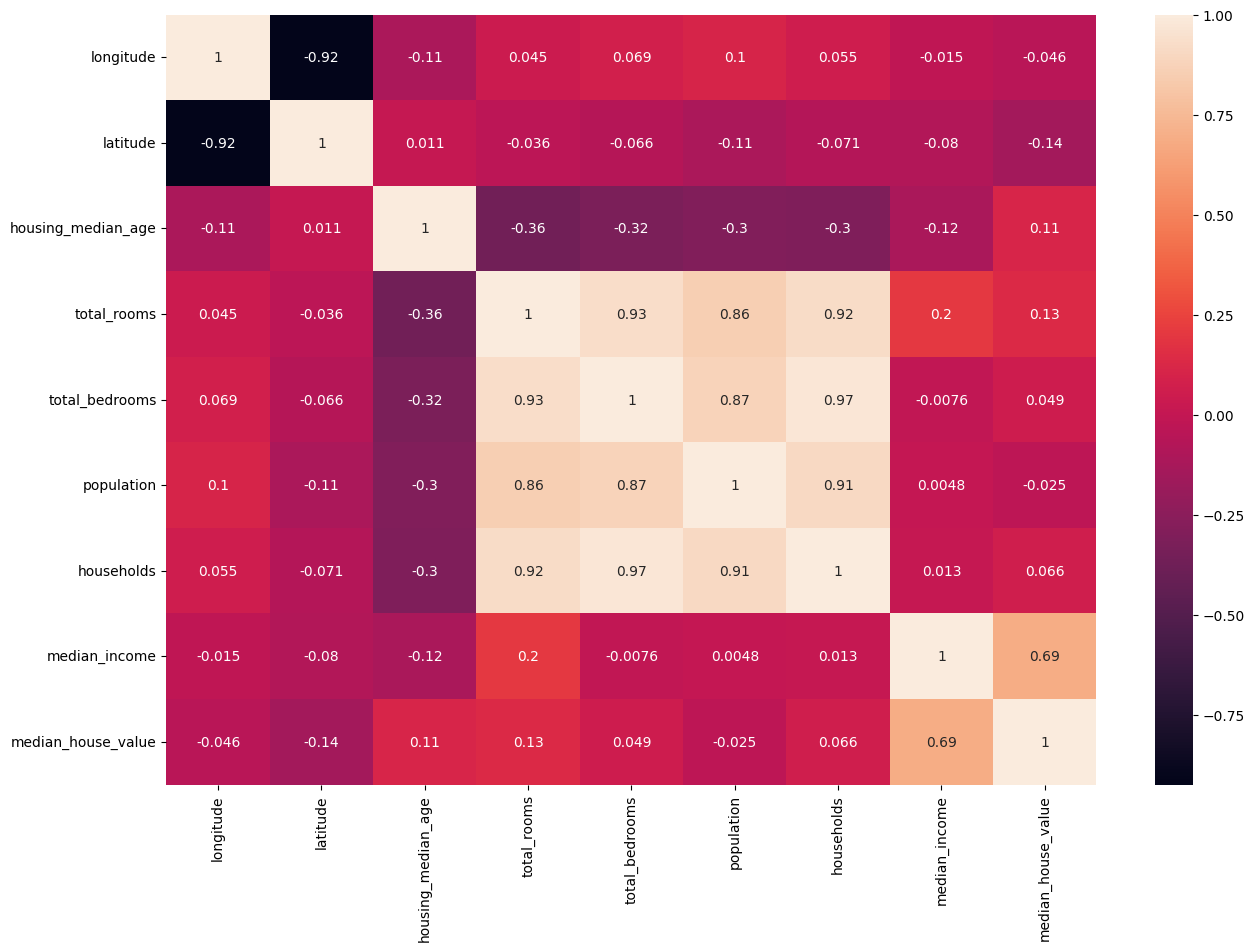

In [14]:
fig,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,color = 'r')
plt.show()

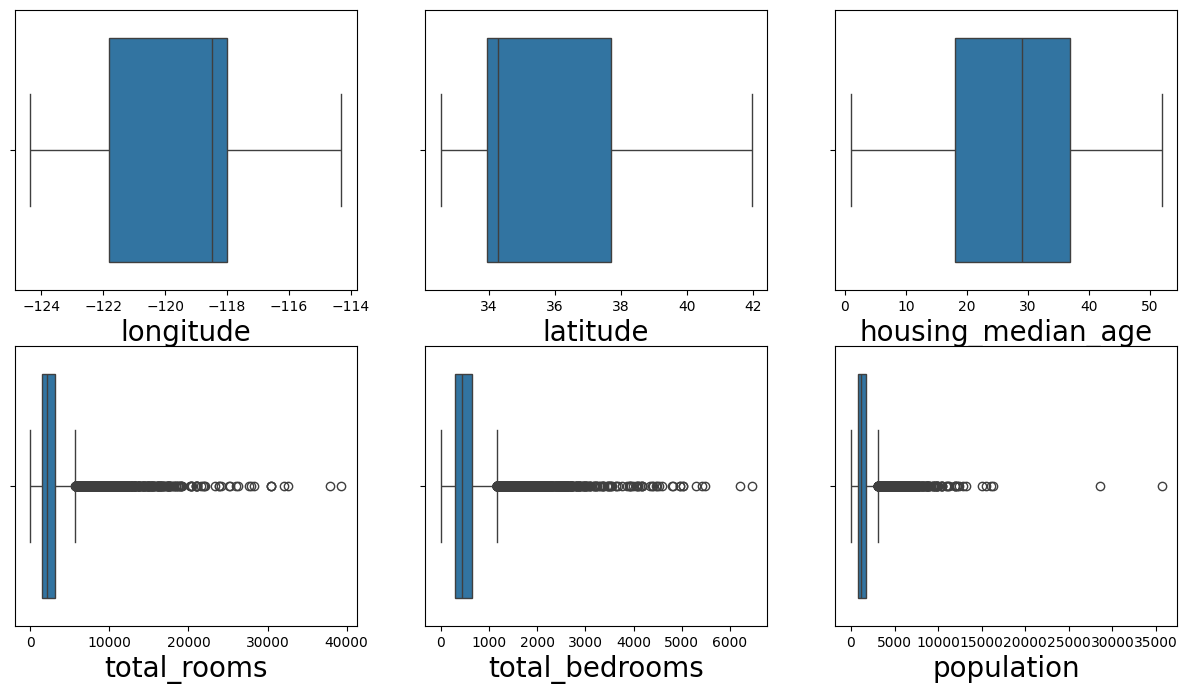

In [15]:
df_num = data1.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label


## **Loading Dataset2 and Amalgamation(1+2)**

## Scraped Property Crime Rates and Violent Crime Rates from [Crime Rate From Federal Bureau of Investigation Crime Data Explorer](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/crime-trend)

In [16]:
link2 = 'https://drive.google.com/file/d/1Ap23AWt5v2R7qUFx_iZiAmTwmyibBSiu/view?usp=drive_link'
id2 = link2.split("/")[-2]
downloaded12 = drive.CreateFile({'id':id2})
downloaded12.GetContentFile('CaliHousing_Dataset2.csv')

In [17]:
data2 = pd.read_csv('CaliHousing_Dataset2.csv')
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,property_crime_rate,violent_crime_rate
0,-122.230000,37.880000,41,880,129.000000,322,126,8.325200,452600,NEAR BAY,7.876647,1.422918
1,-122.220000,37.860000,21,7099,1106.000000,2401,1138,8.301400,358500,NEAR BAY,58.732389,10.610019
2,-122.240000,37.850000,52,1467,190.000000,496,177,7.257400,352100,NEAR BAY,12.132972,2.191824
3,-122.250000,37.850000,52,1274,235.000000,558,219,5.643100,341300,NEAR BAY,13.649593,2.465802
4,-122.250000,37.850000,52,1627,280.000000,565,259,3.846200,342200,NEAR BAY,13.820825,2.496735


## Data cleaning - dataset 2

In [18]:
# Describe the 'total_bedrooms' column to understand its distribution
total_bedrooms_description = data2['total_bedrooms'].describe()
total_bedrooms_description, data2['total_bedrooms'].skew()

(count   20433.000000
 mean      537.870553
 std       421.385070
 min         1.000000
 25%       296.000000
 50%       435.000000
 75%       647.000000
 max      6445.000000
 Name: total_bedrooms, dtype: float64,
 3.459546331523342)

In [19]:
# Fill missing values in 'total_bedrooms' with the median
data2['total_bedrooms'].fillna(data2['total_bedrooms'].median(), inplace=True)

# Verify if there are any missing values left
missing_values_after = data2.isnull().sum()
missing_values_after[missing_values_after > 0]

Series([], dtype: int64)

## Visualisations on DS1+DS2

In [20]:
data2.shape

(20640, 12)

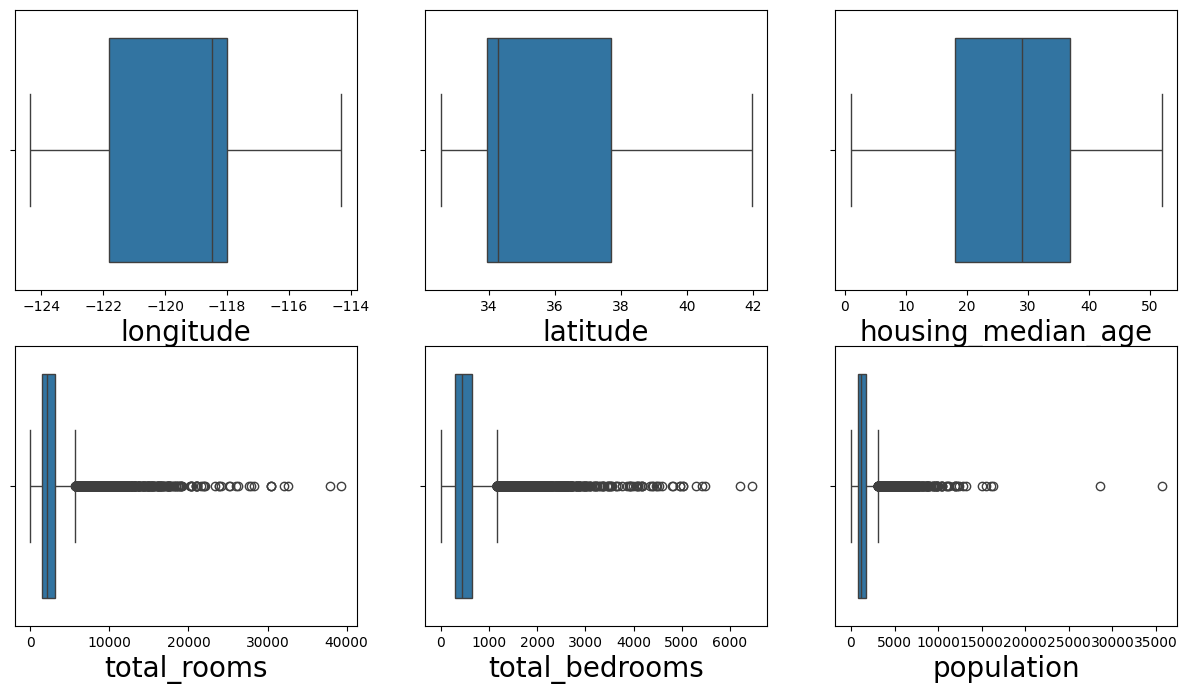

In [21]:
df_num = data2.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label


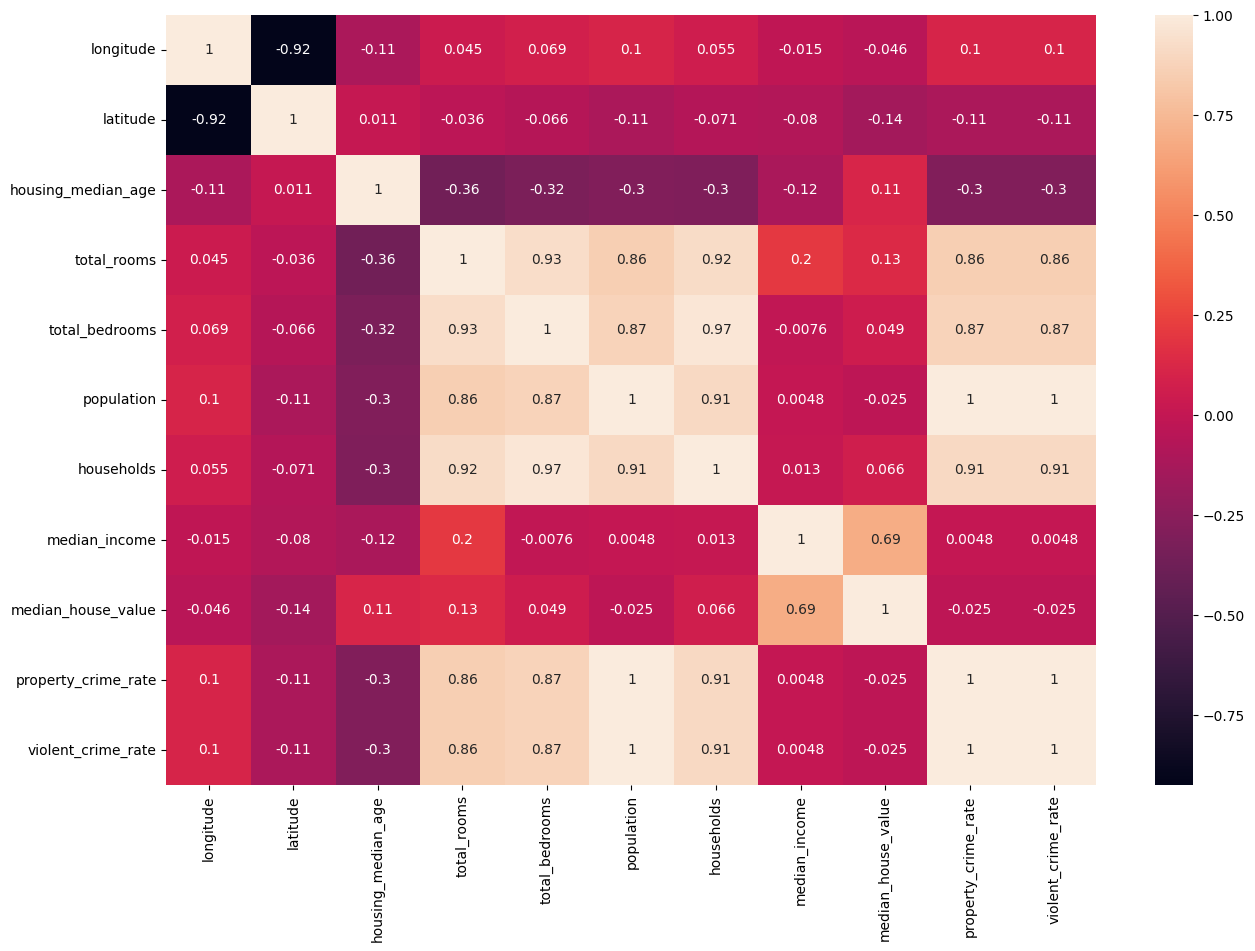

In [22]:
fig,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data2.corr(),annot = True,color = 'r')
plt.show()

## **Loading Dataset3 and Amalgamation(1+2+3)**
dataset3-Scraped schools near me and other data

In [ ]:
link3 = 'https://docs.google.com/spreadsheets/d/1vQQsrSUOqbqJ_w2dOurD3ONo9RO2J_uu/edit?usp=drive_link&ouid=112934431596347292406&rtpof=true&sd=true'
id3 = link3.split("/")[-2]
downloaded13 = drive.CreateFile({'id':id3})
downloaded13.GetContentFile('CaliHousing_Dataset3.xlsx')

In [ ]:
data3 = pd.read_excel('CaliHousing_Dataset3.xlsx')
data3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,property_crime_rate,violent_crime_rate,Schools Near Me,Homeless %
0,-122.230000,37.880000,41,880,129.000000,322,126,8.325200,452600,NEAR BAY,7.876647,1.422918,Kaiser Elementary,0.600000
1,-122.220000,37.860000,21,7099,1106.000000,2401,1138,8.301400,358500,NEAR BAY,58.732389,10.610019,Kaiser Elementary,0.600000
2,-122.240000,37.850000,52,1467,190.000000,496,177,7.257400,352100,NEAR BAY,12.132972,2.191824,Chabot Elementary,0.600000
3,-122.250000,37.850000,52,1274,235.000000,558,219,5.643100,341300,NEAR BAY,13.649593,2.465802,Claremont Middle,0.600000
4,-122.250000,37.850000,52,1627,280.000000,565,259,3.846200,342200,NEAR BAY,13.820825,2.496735,Claremont Middle,0.600000


## Data cleaning - dataset 3

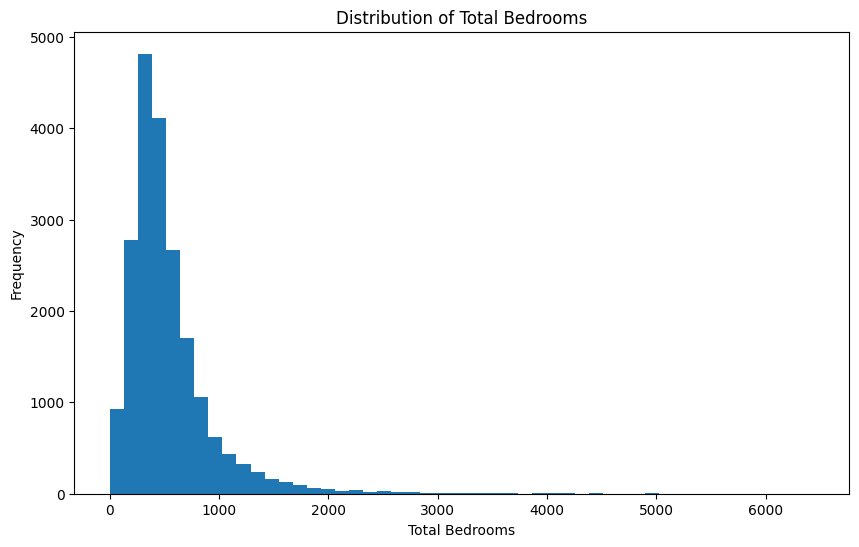

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of 'total_bedrooms'
plt.figure(figsize=(10, 6))
data3['total_bedrooms'].hist(bins=50)
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The distribution of `total_bedrooms` is right-skewed, indicating the presence of outliers with very high values. Given this skewness, it's more appropriate to use the median value for filling in the missing data to avoid the influence of outliers. Let's proceed with filling the missing values in `total_bedrooms` with its median value.

In [ ]:
# Fill missing values in 'total_bedrooms' with its median
median_total_bedrooms = data3['total_bedrooms'].median()
data3['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Verify that there are no more missing values
missing_values_after = data3.isnull().sum()
missing_values_after

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
property_crime_rate    0
violent_crime_rate     0
Schools Near Me        0
Homeless %             0
dtype: int64

## Visualisations on DS1+DS2+DS3

In [ ]:
data3.shape

(20640, 14)

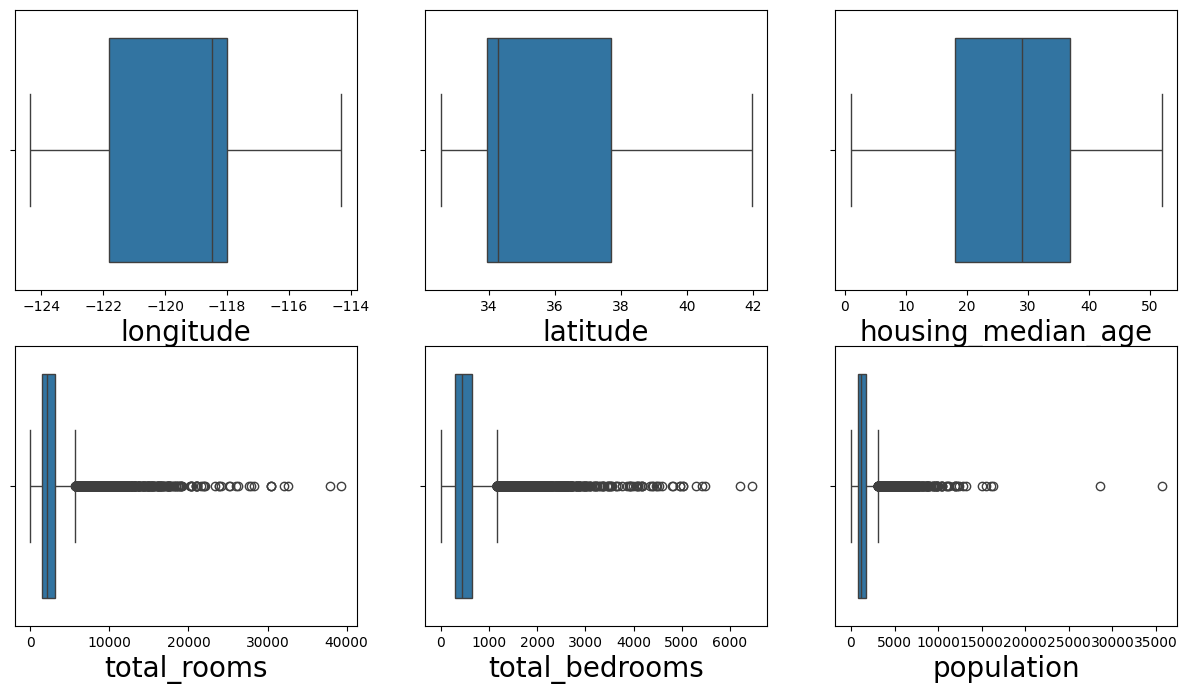

In [ ]:
df_num = data3.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label


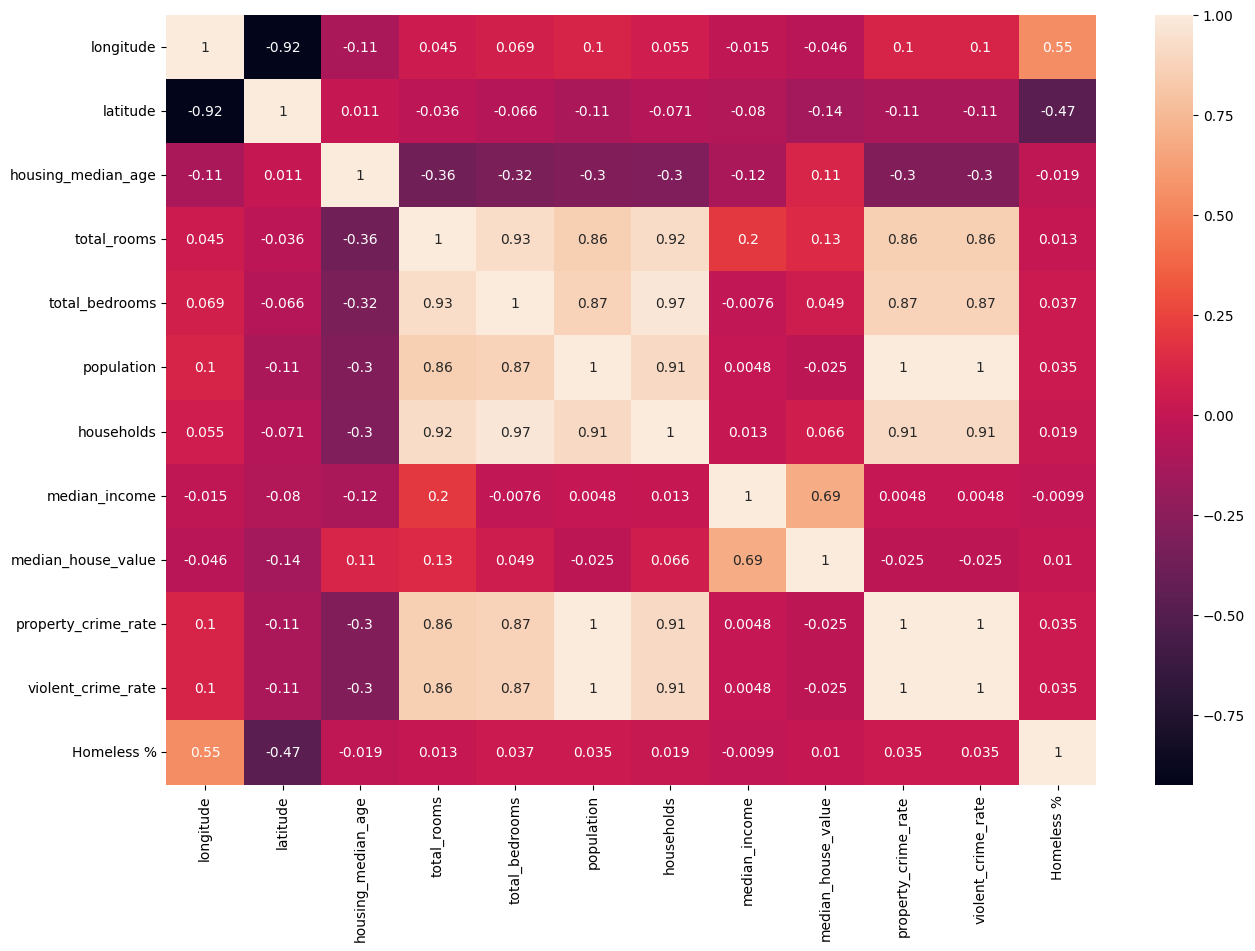

In [ ]:
fig,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data3.corr(),annot = True,color = 'r')
plt.show()


 Concatenate datasets if they have the same structure

In [ ]:
frames = [data1, data2, data3]
data = pd.concat(frames)

### Handling missing values

In [ ]:
data.fillna(data.median(), inplace=True)

### Remove duplicates

In [ ]:
data.drop_duplicates(inplace=True)

##**2.1) and 2.2) Top 5 most important features; gini score, SHAP Values**

### Step 1: Train a Random Forest Model for Gini Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Assuming 'data' is your DataFrame and 'median_house_value' is the target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Step 1: Gini Importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Top 5 Features based on Gini Importance:")
print(feature_importances.head(5))

Top 5 Features based on Gini Importance:
                        importance
median_income             0.479021
ocean_proximity_INLAND    0.143500
longitude                 0.112641
latitude                  0.106443
housing_median_age        0.049086


## **Gini Importance**:
Top 5 Features based on Gini Importance:
                        importance
median_income             0.479021
ocean_proximity_INLAND    0.143500
longitude                 0.112641
latitude                  0.106443
housing_median_age        0.049086

##2.3)explainability: after you train the models, discuss the explainability of the models you chose.

##**3)Data Prep;feature transformation**

##**Plotting distributions of key variables**



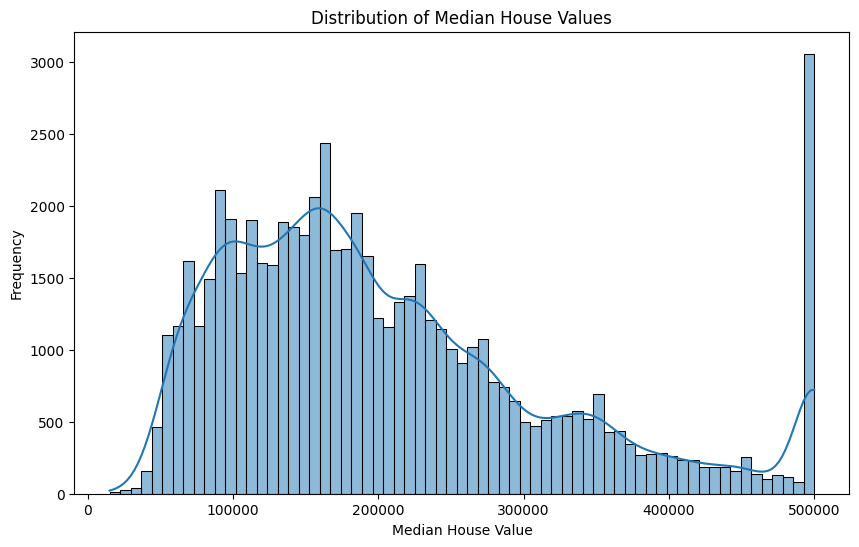

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

##**Plotting relationships between median income and house value**

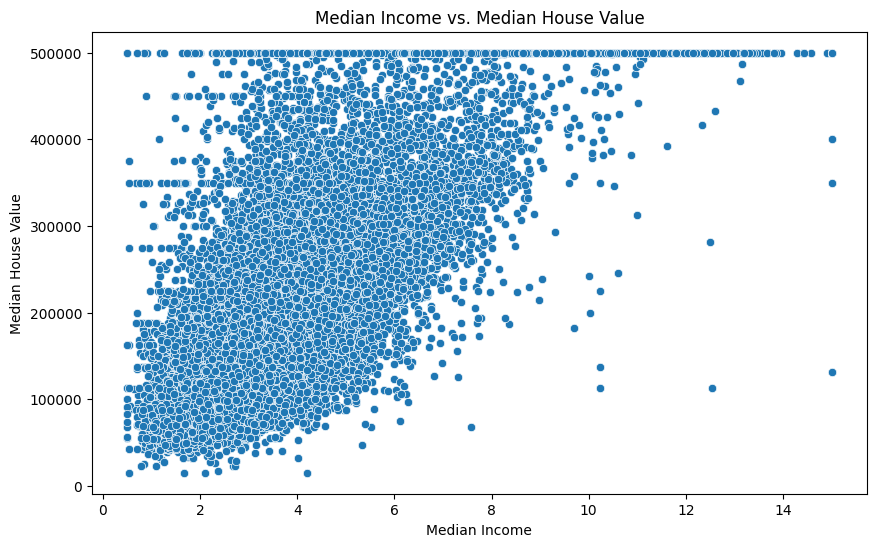

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

##**Plotting the Correlation Matrix**

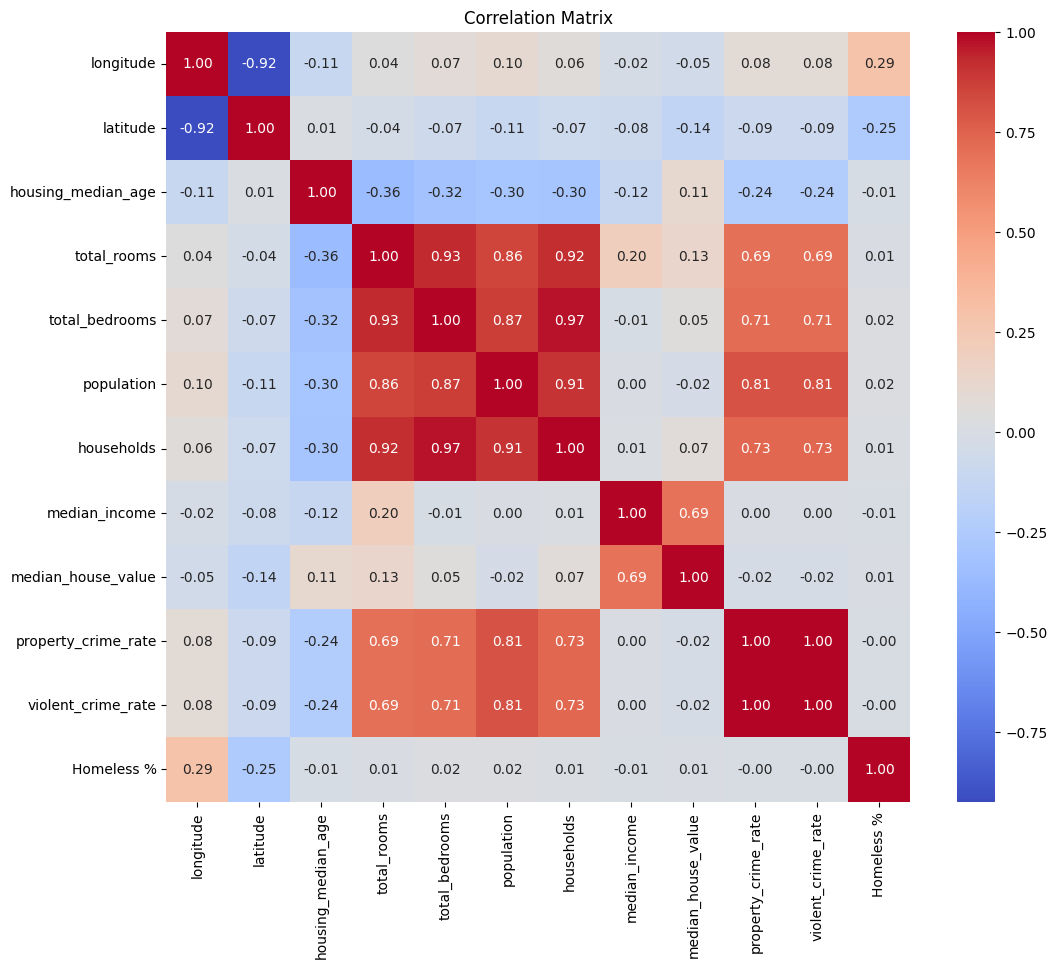

In [ ]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Changing Data Distribution**

We have done 3 amalgamation in the above cells, now we will perform metrics on them.

####### **Calculating Amalgamated Model f1, accuracy, precision, recall, AOC**

###Dataset1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and we're using 'median_house_value' as a binary target variable
# Encoding the target variable
encoder = LabelEncoder()
data1['high_value'] = encoder.fit_transform(data1['median_house_value'] > data1['median_house_value'].median())

X = data1.drop(['median_house_value', 'high_value'], axis=1)
y = data1['high_value']

# Converting categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Making predictions
y_pred = rfc.predict(X_test)

# Evaluating the model
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

# Displaying the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Score': [accuracy1, precision1, recall1, f11, auc1]
})

print(results)

      Metric    Score
0   Accuracy 0.891473
1  Precision 0.888512
2     Recall 0.893710
3   F1 Score 0.891104
4        AUC 0.958063


###Dataset1+Dataset2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and we're using 'median_house_value' as a binary target variable
# Encoding the target variable
encoder = LabelEncoder()
data2['high_value'] = encoder.fit_transform(data2['median_house_value'] > data2['median_house_value'].median())

X = data2.drop(['median_house_value', 'high_value'], axis=1)
y = data2['high_value']

# Converting categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Making predictions
y_pred = rfc.predict(X_test)

# Evaluating the model
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12= f1_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

# Displaying the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Score': [accuracy2, precision2, recall2, f12, auc2]
})

print(results)

      Metric    Score
0   Accuracy 0.887839
1  Precision 0.886187
2     Recall 0.888347
3   F1 Score 0.887266
4        AUC 0.957467


##Dataset1+Dataset2+Dataset3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and we're using 'median_house_value' as a binary target variable
# Encoding the target variable
encoder = LabelEncoder()
data['high_value'] = encoder.fit_transform(data['median_house_value'] > data['median_house_value'].median())

X = data.drop(['median_house_value', 'high_value'], axis=1)
y = data['high_value']

# Converting categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Making predictions
y_pred = rfc.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

# Displaying the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Score': [accuracy, precision, recall, f1, auc]
})

print(results)

      Metric    Score
0   Accuracy 0.958404
1  Precision 0.959742
2     Recall 0.957430
3   F1 Score 0.958585
4        AUC 0.992820


##**Print all metrics after and before amalgamation in a table**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
pd.set_option('display.width', 1000)  # Adjusts the display width to prevent wrapping
# Creating a DataFrame to display the results in a tabular form
results_df = pd.DataFrame({
    'Data Variant': ['Dataset1', 'DS1+DS2', 'DS1+DS2+DS3'],
    'Accuracy': [accuracy1, accuracy2, accuracy],
    'Precision': [precision1, precision2, precision],
    'Recall': [recall1, recall2, recall],
    'F1 Score': [f11, f12, f1],
    'AUC': [auc1, auc2, auc]
})

# Applying styles
styled_df = results_df.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#f4f4f2'), ('color', 'black'), ('font-weight', 'bold')]}]
    ) \
    .set_properties(**{'background-color': '#f9f9f9', 'color': 'black'}) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='#ffcccb')

styled_df



,Data Variant,Accuracy,Precision,Recall,F1 Score,AUC
0,Dataset1,0.891473,0.888512,0.893710,0.891104,0.958063
1,DS1+DS2,0.887839,0.886187,0.888347,0.887266,0.957467
2,DS1+DS2+DS3,0.958404,0.959742,0.957430,0.958585,0.992820


#**Clustering**

## **5)Implementing ml algorithms to build models and refine your data narrative**

###Performing clustering

**Hierarchical clustering**: It is a method of cluster analysis which seeks to build a hierarchy of clusters. It is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

**How it Works**
Hierarchical clustering starts by treating each observation as a separate cluster.
Then, it repeatedly executes the following **two steps:**

Identify the two clusters that are closest together, and
Merge the two most similar clusters.

This iterative process continues until all the clusters are merged together. This is known as agglomerative hierarchical clustering. There's also a divisive hierarchical clustering method, which works in the opposite way. It starts with all observations in a single cluster and divides it into smaller pieces.


**Agglomerative (Bottom-up approach):** Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

###Hierarchical Clustering

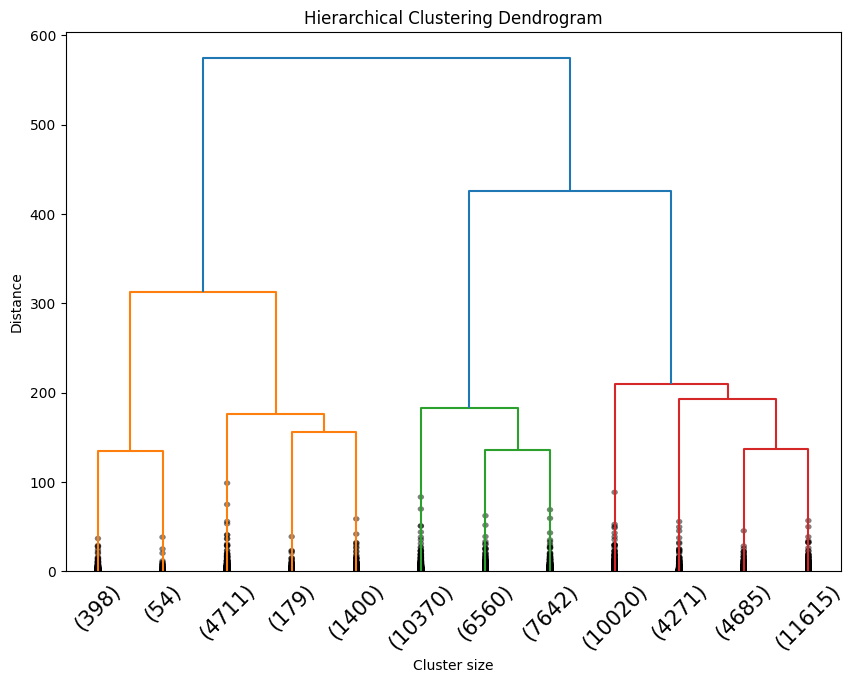

Based on the dendrogram, enter the optimal number of clusters: 4


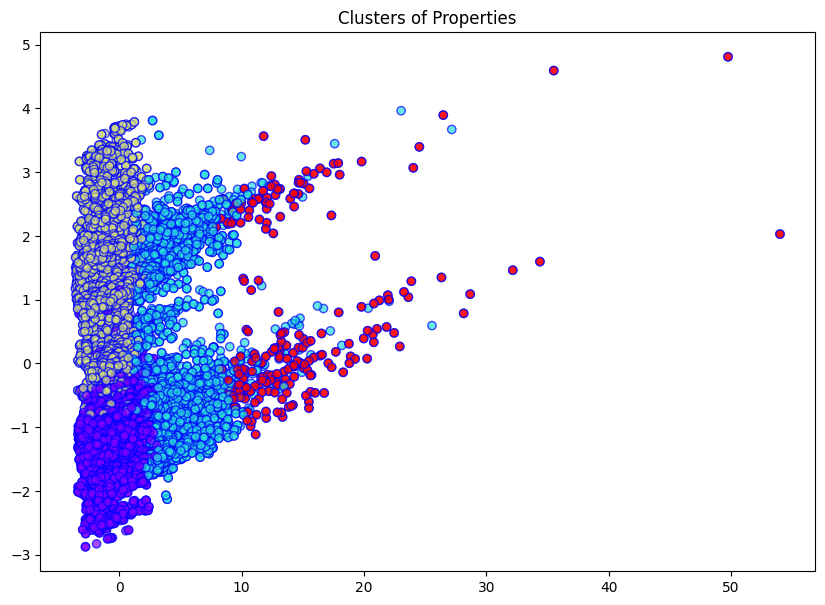

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Preparing the dataset (Assuming 'data' is your DataFrame)
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'property_crime_rate', 'violent_crime_rate']  # Add or remove features based on availability and relevance
X_clustering = data[features].fillna(0)  # Simple handling of missing values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Generating the linkage matrix
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# Decide on the number of clusters based on the dendrogram and proceed to fit the model
n_clusters = int(input("Based on the dendrogram, enter the optimal number of clusters: "))
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X_scaled)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Clusters of Properties')
plt.show()

##5.1 and 5.2 :

Define Golden Cluster:

The term "golden cluster" typically refers to a cluster or group of data points that represents the ideal or desired outcome in a clustering task. The concept of a golden cluster is subjective and context-dependent, often defined based on domain knowledge or specific requirements of the problem being addressed.


#**Fractal Distance Calculation**

Fractal-clustering can be used to identify patterns in the dataset that may not be apparent through other techniques. For an instance, the model can be used to identify clusters of houses with similar pricing and features that may be located in different neighborhoods. This information can assist real estate companies and property investors in identifying areas with high potential for property appreciation.



In [ ]:
import numpy as np

# Define the function fractal_distance as provided
def fractal_distance(p1, p2):
    x1, y1, x2, y2 = p1[0], p1[1], p2[0], p2[1]
    num_divisions = 3
    # Create a grid with num_divisions x num_divisions boxes
    x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
    y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
    grid = np.zeros((num_divisions, num_divisions))

    # Place a point at each of the two endpoints
    x1_idx = np.argmin(np.abs(x - x1)) - 1
    y1_idx = np.argmin(np.abs(y - y1)) - 1
    grid[y1_idx, x1_idx] = 1
    x2_idx = np.argmin(np.abs(x - x2)) - 1
    y2_idx = np.argmin(np.abs(y - y2)) - 1
    grid[y2_idx, x2_idx] = 1

    # Count the number of boxes that contain at least one point
    num_boxes_with_points = 0
    for i in range(num_divisions):
        for j in range(num_divisions):
            if np.sum(grid[i:i+2, j:j+2]) > 0:
                num_boxes_with_points += 1

    # Calculate the fractal dimension and use it to estimate the length of the path
    fractal_dim = np.log(num_boxes_with_points) / np.log(2)
    fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return fractal_length

# Define two points
p1 = (0, 0)
p2 = (1, 1)

# Calculate the fractal distance between the two points
distance = fractal_distance(p1, p2)

# Print the result
print(f"The fractal distance between {p1} and {p2} is: {distance}")

The fractal distance between (0, 0) and (1, 1) is: 5.656854249492381


###**K-Means with Fractal distance**

Implementing K-Means clustering with a custom distance metric, such as a fractal distance, involves modifying the traditional Euclidean distance calculation part of the algorithm. K-Means is inherently designed around the concept of minimizing variance (sum of squared Euclidean distances) within clusters, which makes altering its distance metric non-trivial, especially with algorithms optimized for speed and scalability that assume Euclidean geometry.

In [ ]:
!pip install pyclustering  -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=54bed3df39b6793bbd80c047af9b743c274fd436609520f41227d7bd98d39fd1
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


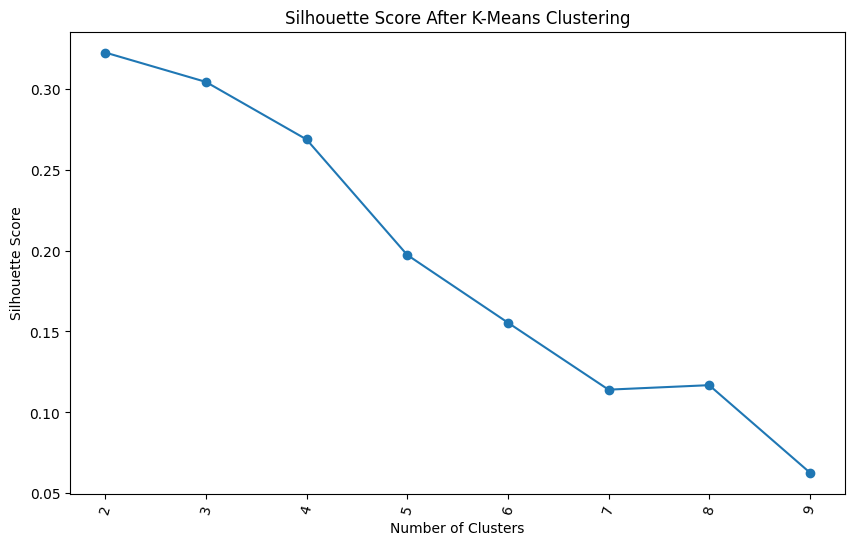

clustering performance
-----------------------------------
silhouette score: 0.3043773634315297


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding, cluster_encoder
from pyclustering.cluster.silhouette import silhouette

# Define the fractal_distance function
def fractal_distance(p1, p2):
    x1, y1, x2, y2 = p1[0], p1[1], p2[0], p2[1]
    num_divisions = 3
    x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
    y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
    grid = np.zeros((num_divisions, num_divisions))
    x1_idx, y1_idx = np.argmin(np.abs(x - x1)) - 1, np.argmin(np.abs(y - y1)) - 1
    x2_idx, y2_idx = np.argmin(np.abs(x - x2)) - 1, np.argmin(np.abs(y - y2)) - 1
    grid[y1_idx, x1_idx] = 1
    grid[y2_idx, x2_idx] = 1
    num_boxes_with_points = np.sum(grid > 0)
    fractal_dim = np.log(num_boxes_with_points) / np.log(2)
    fractal_length = (2 ** fractal_dim) * np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return fractal_length

# Function to plot silhouette scores for different cluster counts
def plot_cluster_fractal(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except Exception:
        pass
    X = df.iloc[:,1:].values
    silhouette_score = {}
    metric = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)
    for k in range(2, max_loop):
        initial_centers = random_center_initializer(X, k, random_state=5).initialize()
        instance = kmeans(X, initial_centers=initial_centers, metric=metric)
        instance.process()
        silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
        silhouette_score[k] = np.mean(silhouette_score_i)
    plt.figure(figsize=(10,6))
    plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()), marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score After K-Means Clustering")
    plt.xticks([i for i in range(2, max_loop)], rotation=75)
    plt.show()

# Function to apply clustering and return modified DataFrame with cluster assignments
def apply_cluster_fractal(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except Exception:
        pass
    X = df.iloc[:,1:].values
    metric = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)
    initial_centers = random_center_initializer(X, clusters, random_state=5).initialize()
    instance = kmeans(X, initial_centers=initial_centers, metric=metric)
    instance.process()
    silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
    score = np.mean(silhouette_score_i)
    encoder = cluster_encoder(instance.get_cluster_encoding(), instance.get_clusters(), X)
    encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
    df['cluster'] = encoder.get_clusters()
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    return df

# Example usage with a dummy DataFrame
# Replace this with your actual DataFrame
df = pd.DataFrame(np.random.rand(100, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

plot_cluster_fractal(df, max_loop=10)  # Plot to decide on the number of clusters
df_clustered = apply_cluster_fractal(df, clusters=3)  # Apply clustering with the chosen number of

###**K-Means with Euclidean distance**


K-Means clustering with Euclidean distance is the standard implementation of the K-Means algorithm, widely used for partitioning a dataset into a set of k groups (or clusters) based on feature similarity. Here's a breakdown of how K-Means works with Euclidean distance, along with a simple implementation:

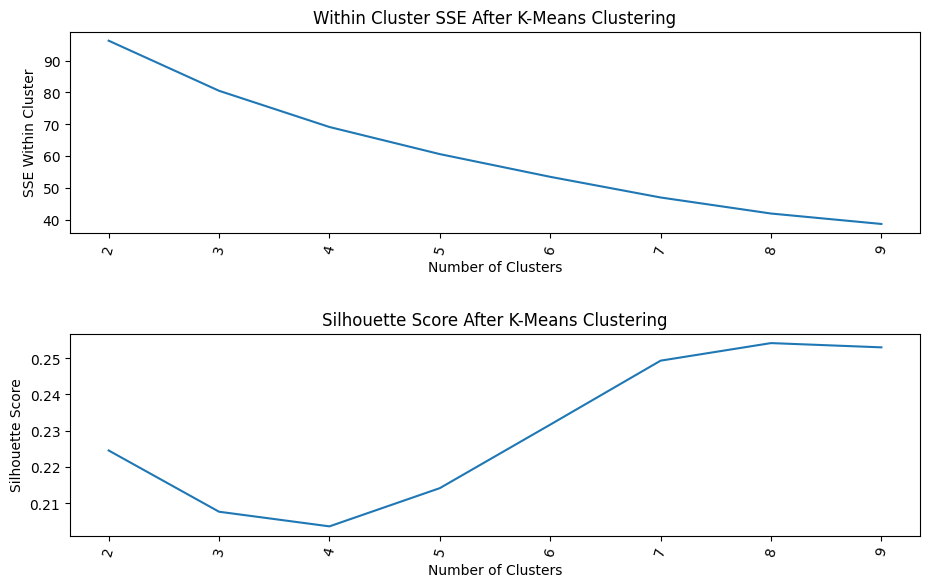

clustering performance
-----------------------------------
Silhouette score: 0.21
SSE within cluster: 80.50924601144833
   Feature1  Feature2  Feature3  Feature4  Feature5  cluster
0  0.379567  0.079481  0.409140  0.822328  0.271662        1
1  0.987461  0.693424  0.407585  0.192509  0.033701        2
2  0.896330  0.724827  0.523684  0.781597  0.551800        0
3  0.573150  0.543113  0.915920  0.078349  0.886988        0
4  0.217980  0.911757  0.865921  0.087744  0.832763        0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# Function to plot SSE and silhouette scores for varying number of clusters
def plot_cluster_euclidean(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        pass
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, metric='euclidean', random_state=10)

    plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE Within Cluster")
    plt.title("Within Cluster SSE After K-Means Clustering")
    plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score After K-Means Clustering")
    plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
    plt.show()

# Function to apply KMeans clustering and return modified DataFrame with cluster assignments
def apply_cluster_euclidean(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        pass
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, metric='euclidean', random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print(f"Silhouette score: {score.round(2)}")
    print(f"SSE within cluster: {sse_within_cluster}")

    return df

# Example usage with a dummy DataFrame
# Replace this with your actual DataFrame
df = pd.DataFrame(np.random.rand(100, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

plot_cluster_euclidean(df, max_loop=10)  # Plot to decide on the number of clusters
df_clustered = apply_cluster_euclidean(df, clusters=3)  # Apply clustering with the chosen number of clusters
print(df_clustered.head())  # Print the first few rows of the clustered DataFrame

#Fractal clustering with Euclidean distance

1st trail

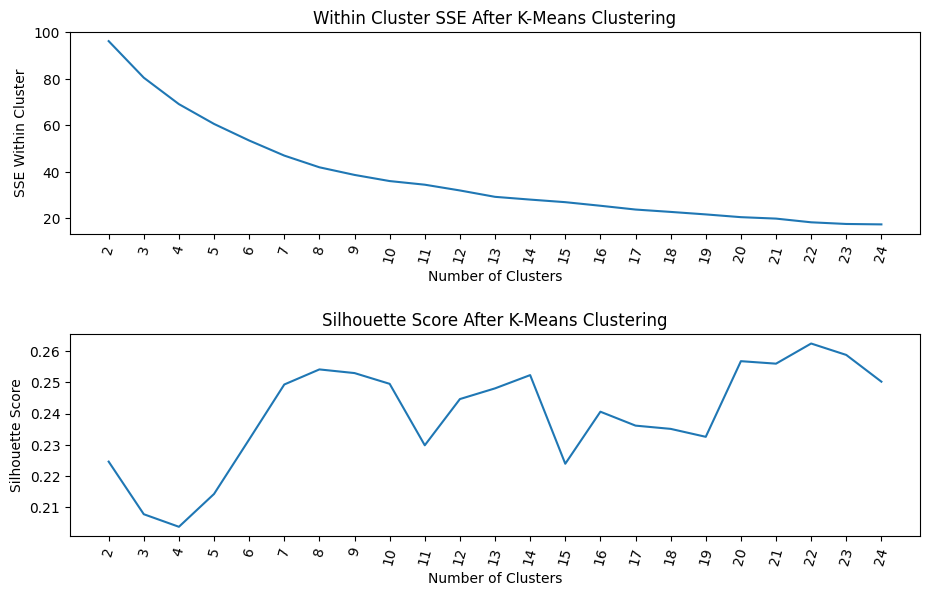

In [ ]:
plot_cluster_euclidean(df, 25)

In [ ]:
first_trial = apply_cluster_euclidean(df, 3)

clustering performance
-----------------------------------
Silhouette score: 0.21
SSE within cluster: 80.50924601144833


In [ ]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          37
1        1          36
2        2          27
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20', '#2095DF']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
first_trial.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,cluster,c
0,0.379567,0.079481,0.409140,0.822328,0.271662,1,#81DF20
1,0.987461,0.693424,0.407585,0.192509,0.033701,2,#2095DF
2,0.896330,0.724827,0.523684,0.781597,0.551800,0,#DF2020
3,0.573150,0.543113,0.915920,0.078349,0.886988,0,#DF2020
4,0.217980,0.911757,0.865921,0.087744,0.832763,0,#DF2020


2nd trail

In [ ]:
df3 = first_trial.query("cluster == 1").reset_index(drop=True).drop(['c'], axis=1)

In [ ]:
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          37
1        1          36
2        2          27
Name: cluster, dtype: int64

**Golden Cluster**:
During the Clustering 2, we found that there are 2 clusters 0, 1 with each value mean value of price and rent zestimates. CLuster 0 being the **golden cluster** has 37 units dominating right at the edge on cluster 36.

#Fractal clustering with Fractal distance

In [ ]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,cluster,c
0,0.379567,0.079481,0.409140,0.822328,0.271662,1,#81DF20
1,0.987461,0.693424,0.407585,0.192509,0.033701,2,#2095DF
2,0.896330,0.724827,0.523684,0.781597,0.551800,0,#DF2020
3,0.573150,0.543113,0.915920,0.078349,0.886988,0,#DF2020
4,0.217980,0.911757,0.865921,0.087744,0.832763,0,#DF2020


In [ ]:
clustering_df = df.drop(['c'], axis=1)

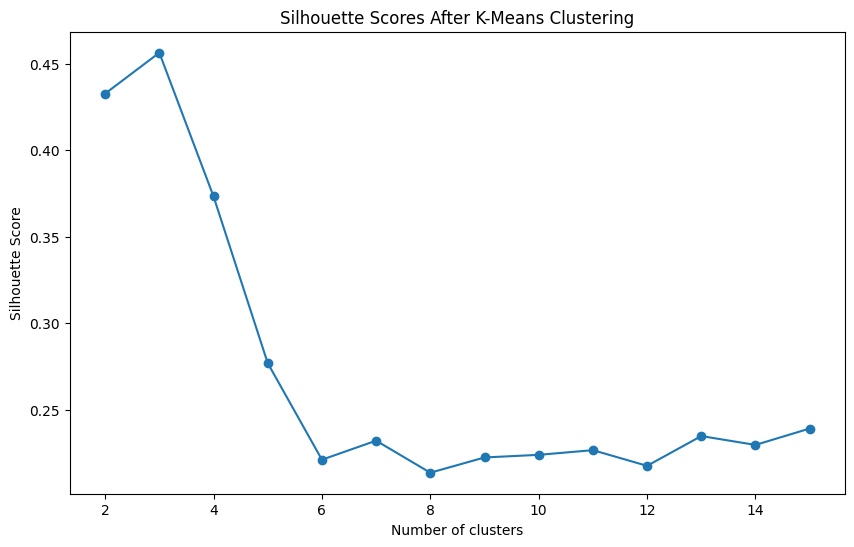

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = clustering_df.values
silhouette_scores = []  # To store silhouette scores for each k
for k in range(2, 16):  # Adjust as per your 'max_loop'
    # Standard KMeans usage
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)

    # Optionally calculate silhouette scores as a measure of cluster quality
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.title('Silhouette Scores After K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

1st trail

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.silhouette import silhouette

def plot_cluster_fractal(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values

    silhouette_score = {}
    metric  = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)

    for k in range(2, max_loop):
        initial_centers = random_center_initializer(X, k, random_state=5).initialize()
        instance = kmeans(X, initial_centers=initial_centers, metric=metric)
        instance.process()
        silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
        silhouette_score[k] = sum(silhouette_score_i) / len(silhouette_score_i)

    _ = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:
def apply_cluster_fractal(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values
    metric  = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)
    initial_centers = random_center_initializer(X, clusters, random_state=5).initialize()
    instance = kmeans(X, initial_centers=initial_centers, metric=metric)
    instance.process()
    silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
    score = sum(silhouette_score_i) / len(silhouette_score_i)

    type_repr = instance.get_cluster_encoding()
    encoder = cluster_encoder(type_repr, instance.get_clusters(), X)
    encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
    cluster = encoder.get_clusters()
    column_series = pd.Series(np.array(cluster))
    df = df.assign(cluster=column_series)

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))

    return df

In [ ]:
first_trial = apply_cluster_fractal(clustering_df, 2)

clustering performance
-----------------------------------
silhouette score: 0.3589281267139058


In [ ]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          47
1        1          53
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1]})
first_trial.dropna(inplace=True)
first_trial.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,cluster,c
0,0.379567,0.079481,0.409140,0.822328,0.271662,1,#81DF20
1,0.987461,0.693424,0.407585,0.192509,0.033701,0,#DF2020
2,0.896330,0.724827,0.523684,0.781597,0.551800,0,#DF2020
3,0.573150,0.543113,0.915920,0.078349,0.886988,0,#DF2020
4,0.217980,0.911757,0.865921,0.087744,0.832763,0,#DF2020


2nd trail

In [ ]:
df3 = first_trial.query("cluster == 1").reset_index(drop=True).drop(['c'], axis=1)

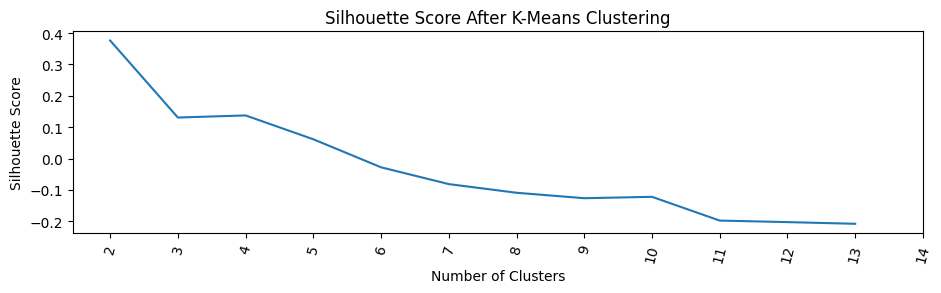

In [ ]:
plot_cluster_fractal(df3, max_loop=15)

In [ ]:
second_trial= apply_cluster_fractal(df3, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.3762961134581123


In [ ]:
cluster_perf_df = second_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          16
1        1          37
Name: cluster, dtype: int64

**Golden Cluster**:
During the Clustering 2, we found that there are 2 clusters 0, 1 with each value mean value of price and rent zestimates. CLuster 1 being the **golden cluster** has 37 units dominating right at the edge on cluster 16.

##5.3 Train and Apply Algorithms(muller loop)

## **Muller loop Regression**



We will proceed by:

Preprocessing the data (handling categorical variables and scaling numerical ones).
Splitting the data into training and testing sets.
Applying at least five different regression algorithms.
Evaluating each model's performance.
For regression, we can consider the following algorithms:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)

###**Muller loop on DS1**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Separate features and target
X = data1.drop(['median_house_value'], axis=1)
y = data1['median_house_value']

# Identifying numerical and categorical columns (excluding 'Schools Near Me' due to its specificity)
categorical_features = ['ocean_proximity']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing specific and identifier columns from numerical features
numerical_features.remove('longitude')  # Likely identifier
numerical_features.remove('latitude')   # Likely identifier
if 'Schools Near Me' in numerical_features: numerical_features.remove('Schools Near Me')  # Specific column, if treated as numeric

# Building preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape


((16512, 12), (4128, 12))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Dictionary to store evaluation results
results = {}

# Training and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_transformed, y_train)

    # Predicting on the testing set
    y_pred = model.predict(X_test_transformed)

    # Calculating evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Storing the results
    results[name] = {'RMSE': rmse, 'R² score': r2}

# Transforming the results dictionary into a DataFrame for better visualization
results_df_reg1 = pd.DataFrame(results).T  # Transpose to get models as rows
styled_df = results_df.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

styled_df

styled_df_reg1 = results_df_reg1.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

styled_df_reg1


,RMSE,R² score
Linear Regression,59304.77,0.73
Decision Tree,70722.25,0.62
Random Forest,51222.03,0.80
Gradient Boosting,52761.53,0.79
SVR,115993.68,-0.03


###**Muller loop on DS1+DS2**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Separate features and target
X = data2.drop(['median_house_value'], axis=1)
y = data2['median_house_value']

# Identifying numerical and categorical columns (excluding 'Schools Near Me' due to its specificity)
categorical_features = ['ocean_proximity']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing specific and identifier columns from numerical features
numerical_features.remove('longitude')  # Likely identifier
numerical_features.remove('latitude')   # Likely identifier
if 'Schools Near Me' in numerical_features: numerical_features.remove('Schools Near Me')  # Specific column, if treated as numeric

# Building preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape


((16512, 14), (4128, 14))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Dictionary to store evaluation results
results = {}

# Training and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_transformed, y_train)

    # Predicting on the testing set
    y_pred = model.predict(X_test_transformed)

    # Calculating evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Storing the results
    results[name] = {'RMSE': rmse, 'R² score': r2}

# Transforming the results dictionary into a DataFrame for better visualization
results_df_reg2 = pd.DataFrame(results).T  # Transpose to get models as rows
styled_df = results_df.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

styled_df

styled_df_reg2 = results_df_reg2.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

styled_df_reg2


,RMSE,R² score
Linear Regression,59285.68,0.73
Decision Tree,70426.13,0.62
Random Forest,51182.13,0.80
Gradient Boosting,52757.39,0.79
SVR,116115.29,-0.03


###**Muller loop on DS1+DS2+DS3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Separate features and target
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Identifying numerical and categorical columns (excluding 'Schools Near Me' due to its specificity)
categorical_features = ['ocean_proximity']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing specific and identifier columns from numerical features
numerical_features.remove('longitude')  # Likely identifier
numerical_features.remove('latitude')   # Likely identifier
if 'Schools Near Me' in numerical_features: numerical_features.remove('Schools Near Me')  # Specific column, if treated as numeric

# Building preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape


((49524, 15), (12381, 15))

The data has been preprocessed, and we have transformed the training and testing sets. The preprocessed training set contains 49,524 samples, and the testing set contains 12,381 samples, each with 15 features after handling categorical variables and scaling numerical ones.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Dictionary to store evaluation results
results = {}

# Training and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_transformed, y_train)

    # Predicting on the testing set
    y_pred = model.predict(X_test_transformed)

    # Calculating evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Storing the results
    results[name] = {'RMSE': rmse, 'R² score': r2}

# Transforming the results dictionary into a DataFrame for better visualization
results_df_reg3= pd.DataFrame(results).T  # Transpose to get models as rows
styled_df = results_df.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

# Display the styled DataFrame
styled_df

styled_df_reg3 = results_df_reg3.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#007bff'), ('color', 'white')]}]
    ) \
    .set_properties(**{'background-color': '#f8f9fa', 'color': 'black'}) \
    .applymap(lambda x: 'color: green' if isinstance(x, (int, float)) and x >= 0.8 else 'color: red', subset=['R² score']) \
    .format("{:.2f}")

styled_df_reg3


,RMSE,R² score
Linear Regression,58935.84,0.74
Decision Tree,17464.26,0.98
Random Forest,18899.08,0.97
Gradient Boosting,51196.44,0.80
SVR,115707.90,-0.00


The best regressor model according to the results shown in the image is the one with the lowest RMSE (Root Mean Square Error) and the highest R² (R-squared) score.

The **Random Forest regressor** has the lowest RMSE of 51222.03 and the highest R² score of 0.80, indicating it has the best performance among the models listed. Lower RMSE values indicate closer fit to the data, and a higher R² score indicates that the model explains a greater proportion of the variance.

## **Muller Loop Classification:**

To adapt the approach for classification, we first need to transform the continuous target variable ('median_house_value') into a categorical one. A common way to do this is by dividing the house values into categories, such as "low", "medium", and "high" based on certain value thresholds. Once we have a categorical target, we can then proceed with classification algorithms.


Convert 'median_house_value' into a categorical variable with categories based on its quartile distribution to ensure a balanced class distribution.
Apply at least five different classification algorithms.
Evaluate each model's performance using appropriate metrics (like accuracy, precision, recall, and F1-score).
Let's start by transforming 'median_house_value' into a categorical variable.

In [ ]:
# Transforming 'median_house_value' into a categorical variable based on quartiles
y_categorical = pd.qcut(y, q=4, labels=['low', 'medium', 'high', 'very high'])

# Check the distribution of the new categorical target
y_categorical.value_counts()

low          15481
medium       15480
very high    15475
high         15469
Name: median_house_value, dtype: int64

The 'median_house_value' has been successfully transformed into a categorical variable with four categories: 'low', 'medium', 'high', and 'very high', each representing a quartile of the original distribution. This ensures a balanced class distribution for our classification models.

Next, we'll proceed with applying the following five classification algorithms:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Machine (SVM) Classifier

For each model, we'll fit it to the training data (with the transformed categorical target), make predictions on the testing data, and evaluate the performance using metrics such as accuracy, precision, recall, and F1-score. Let's begin by training and evaluating these models.

###**Muller loop on DS1**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Convert the median_house_value to a binary target
data1['high_value'] = (data1['median_house_value'] > data1['median_house_value'].median()).astype(int)
y = data1['high_value']
X = data1.drop(['median_house_value', 'high_value'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVC", SVC(random_state=42))
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Assume this loop runs and evaluates your classifiers
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Here you'd calculate the precision, recall, and F1-score in addition to the accuracy
    accuracy = accuracy_score(y_test, y_pred)

     # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assuming binary classification, you might need to adjust for multiclass)
    precision = report_dict['1']['precision']  # Replace '1' with the appropriate class label if different
    recall = report_dict['1']['recall']
    f1_score = report_dict['1']['f1-score']
    support = report_dict['1']['support']

    # Append the results for this classifier to the DataFrame
    results_df = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }, ignore_index=True)

# Display the DataFrame after all classifiers have been evaluated
print(results_df)

            Classifier  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.820010   0.819024 0.818625  0.818825
1        Decision Tree  0.849322   0.847013 0.850317  0.848662
2        Random Forest  0.891473   0.888512 0.893710  0.891104
3    Gradient Boosting  0.873062   0.863398 0.884447  0.873796
4                  SVC  0.656492   0.635314 0.724525  0.676993


###**Muller loop on DS1+DS2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Convert the median_house_value to a binary target
data2['high_value'] = (data2['median_house_value'] > data2['median_house_value'].median()).astype(int)
y = data2['high_value']
X = data2.drop(['median_house_value', 'high_value'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVC", SVC(random_state=42))
]

# Initialize an empty DataFrame to store results
results_df2 = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Assume this loop runs and evaluates your classifiers
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Here you'd calculate the precision, recall, and F1-score in addition to the accuracy
    accuracy = accuracy_score(y_test, y_pred)

     # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assuming binary classification, you might need to adjust for multiclass)
    precision = report_dict['1']['precision']  # Replace '1' with the appropriate class label if different
    recall = report_dict['1']['recall']
    f1_score = report_dict['1']['f1-score']
    support = report_dict['1']['support']

    # Append the results for this classifier to the DataFrame
    results_df2 = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }, ignore_index=True)

# Display the DataFrame after all classifiers have been evaluated
print(results_df2)

            Classifier  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.820010   0.819024 0.818625  0.818825
1        Decision Tree  0.849322   0.847013 0.850317  0.848662
2        Random Forest  0.891473   0.888512 0.893710  0.891104
3    Gradient Boosting  0.873062   0.863398 0.884447  0.873796
4                  SVC  0.656492   0.635314 0.724525  0.676993
5                  SVC  0.656977   0.635626 0.725500  0.677596


###**Muller loop on DS1+DS2+DS3**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Convert the median_house_value to a binary target
data3['high_value'] = (data3['median_house_value'] > data3['median_house_value'].median()).astype(int)
y = data3['high_value']
X = data3.drop(['median_house_value', 'high_value'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize classification models
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=20, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVC", SVC(random_state=42))
]

# Initialize an empty DataFrame to store results
results_df3 = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Assume this loop runs and evaluates your classifiers
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Here you'd calculate the precision, recall, and F1-score in addition to the accuracy
    accuracy = accuracy_score(y_test, y_pred)

     # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assuming binary classification, you might need to adjust for multiclass)
    precision = report_dict['1']['precision']  # Replace '1' with the appropriate class label if different
    recall = report_dict['1']['recall']
    f1_score = report_dict['1']['f1-score']
    support = report_dict['1']['support']

    # Append the results for this classifier to the DataFrame
    results_df3 = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }, ignore_index=True)

# Display the DataFrame after all classifiers have been evaluated
print(results_df3)

            Classifier  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.820010   0.819024 0.818625  0.818825
1        Decision Tree  0.849322   0.847013 0.850317  0.848662
2        Random Forest  0.891473   0.888512 0.893710  0.891104
3    Gradient Boosting  0.873062   0.863398 0.884447  0.873796
4                  SVC  0.656492   0.635314 0.724525  0.676993
5                  SVC  0.656492   0.639219 0.726133  0.679910


#**6) Latent Variables or Latent Manifolds**

# Dataset 1 + Latent Variables

In [ ]:
!pip install -U -q PyDrive

In [ ]:
link4 = 'https://drive.google.com/file/d/1aE22NTUgmXsNQELEpoWf0foHeczIFQK4/view?usp=drive_link'
id4 = link4.split("/")[-2]

downloaded14 = drive.CreateFile({'id':id4})
downloaded14.GetContentFile('data1_latent.csv')


In [ ]:
latentvariable = pd.read_csv('data1_latent.csv')
latentvariable.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,status_text,broker_name,ZIP,NatWalkInd,D2B_E8MIXA,R_PCTLOWWAGE,hoa,mortgage_hoa,target
0,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.000000,4.000000,1996.000000,2.500000,2489700.000000,4995.000000,3,House for sale,Unknown,95125.000000,12.617343,0.573923,0.181678,370.000000,14940.000000,0
1,249,2091601783,"200 Ford Rd SPC 95, San Jose, CA 95138",37.253147,-121.793335,244900,2.000000,3.000000,1248.000000,2.500000,238000.000000,465.000000,254,Home for sale,Unknown,95138.000000,12.617343,0.573923,0.181678,370.000000,1888.380000,0
2,310,2098752827,"2151 Oakland Rd SPC 38, San Jose, CA 95131",37.400013,-121.906790,355000,2.000000,3.000000,1440.000000,2.500000,384300.000000,543.000000,30,Home for sale,Unknown,95131.000000,12.617343,0.573923,0.181678,370.000000,2571.000000,0
3,235,19830798,"775 Warring Dr APT 2, San Jose, CA 95123",37.247940,-121.853386,569000,1.000000,2.000000,903.000000,2.500000,658500.000000,2650.000000,137,Townhouse for sale,Unknown,95123.000000,12.617343,0.573923,0.181678,370.000000,3897.800000,0
4,394,19706511,"673 Yolo Ct, San Jose, CA 95136",37.273530,-121.859276,640000,2.000000,2.000000,912.000000,2.500000,1785571.780436,2749.000000,19,Condo for sale,Unknown,95136.000000,12.617343,0.573923,0.181678,370.000000,4338.000000,0


In [ ]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,high_value
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY,1
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY,1
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY,1
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY,1
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY,1


In [ ]:
data1['NatWalkInd'] = latentvariable['NatWalkInd']

# Assign the updated DataFrame to data1_latent for clarity
latentvariable = data1.copy()

data1_latent = data1

# Display the first few rows of the updated DataFrame
print(data1_latent.head())

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  high_value  NatWalkInd
0 -122.230000 37.880000           41.000000   880.000000      129.000000  322.000000  126.000000       8.325200       452600.000000        NEAR BAY           1   12.617343
1 -122.220000 37.860000           21.000000  7099.000000     1106.000000 2401.000000 1138.000000       8.301400       358500.000000        NEAR BAY           1   12.617343
2 -122.240000 37.850000           52.000000  1467.000000      190.000000  496.000000  177.000000       7.257400       352100.000000        NEAR BAY           1   12.617343
3 -122.250000 37.850000           52.000000  1274.000000      235.000000  558.000000  219.000000       5.643100       341300.000000        NEAR BAY           1   12.617343
4 -122.250000 37.850000           52.000000  1627.000000      280.000000  565.000000  259.000000       3.846200       342200.000000        N

In [ ]:
# Fill null values in 'total_bedrooms' with the median value of the column
median_value_bedrooms = data1_latent['total_bedrooms'].median()
data1_latent['total_bedrooms'].fillna(median_value_bedrooms, inplace=True)


# Fill null values in 'NatWalkInd' with the median value of the column
median_value = data1_latent['NatWalkInd'].median()
data1_latent['NatWalkInd'].fillna(median_value, inplace=True)

# Check again for null values to ensure the column is now clean
print(data1_latent.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
high_value            0
NatWalkInd            0
dtype: int64


## Muller Loop Classification:

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable by categorizing 'median_house_value' into three categories: low, medium, high
# Use quantiles to define these categories for a balanced classification task
data1_latent['investment_potential'] = pd.qcut(data1_latent['median_house_value'],
                                               q=[0, .33, .66, 1],
                                               labels=['low', 'medium', 'high'])

# Prepare features and target variable for modeling
a = data1_latent.drop(['median_house_value', 'investment_potential'], axis=1)
b = data1_latent['investment_potential']

# Split the dataset into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to ensure correctness
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((16512, 11), (4128, 11), (16512,), (4128,))

In [ ]:
# Perform one-hot encoding on categorical variables
a_train_encoded = pd.get_dummies(a_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in a_train.columns:
    if a_train[column].dtype == object:  # Check if the column contains categorical variables
        a_train[column] = label_encoder.fit_transform(a_train[column])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100)),
    ("SVM", make_pipeline(StandardScaler(), SVC())),
    ("K-Neighbors", KNeighborsClassifier())
]

# Loop through classifiers, evaluating each
for name, model in classifiers:
    cv_scores = cross_val_score(model, a_train_encoded, b_train, cv=5)
    print(f"{name}: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f}")

Logistic Regression: 0.5242 +/- 0.0052
Random Forest: 0.8229 +/- 0.0067
Gradient Boosting: 0.8053 +/- 0.0042
SVM: 0.7851 +/- 0.0058
K-Neighbors: 0.4745 +/- 0.0025


## Muller Loop Regression:

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,high_value,NatWalkInd,investment_potential
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY,1,12.617343,high
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY,1,12.617343,high
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY,1,12.617343,high
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY,1,12.617343,high
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY,1,12.617343,high


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the feature set and target variable
a1 = data1_latent.drop(['median_house_value'], axis=1)  # Exclude target variable from features
b1 = data1_latent['median_house_value']

# Define column transformer to handle categorical features
categorical_features = ['ocean_proximity']  # Add other categorical features if any
numerical_features = a1.columns.drop(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Assuming 'data1' is your DataFrame and 'investment_potential' is the column you want to convert
a1['investment_potential'] = a1['investment_potential'].map({'high': 1, 'low': 0})

# Assuming 'data1' is your DataFrame
a1 = a1.dropna(subset=['investment_potential'])

# Assuming a1 is a DataFrame and b1 is a Series or a single column DataFrame
a1 = a1.dropna(subset=['investment_potential'])
b1 = b1.loc[a1.index]

# Now you can split
a1_train, a1_test, b1_train, b1_test = train_test_split(a1, b1, test_size=0.3, random_state=42)


a1_train, a1_test, b1_train, b1_test = train_test_split(a1, b1, test_size=0.3, random_state=42)


# Wrap models in a pipeline to include preprocessing
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store the MSE of each model
model_mse = {}

# Process and evaluate each model
for name, model in regression_models.items():
    # Create a pipeline that first transforms the data and then fits the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Train the model using the Spipeline
    pipeline.fit(a1_train, b1_train)

    # Predict on the testing set
    b1_pred = pipeline.predict(a1_test)

    # Calculate the MSE and store it
    mse = mean_squared_error(b1_test, b1_pred)
    model_mse[name] = mse
    print(f"{name} MSE: {mse}")

# Display the MSE of each model to compare their performance
print("Model performance (MSE):")
print(model_mse)

Linear Regression MSE: 3165319625.4365215
Ridge Regression MSE: 3165165171.837441
Lasso Regression MSE: 3165309188.663575
Random Forest Regressor MSE: 1659316355.8167217
Gradient Boosting Regressor MSE: 2131080023.171584
Model performance (MSE):
{'Linear Regression': 3165319625.4365215, 'Ridge Regression': 3165165171.837441, 'Lasso Regression': 3165309188.663575, 'Random Forest Regressor': 1659316355.8167217, 'Gradient Boosting Regressor': 2131080023.171584}


# Dataset 2 + Latent Variables

In [ ]:
data2['NatWalkInd'] = latentvariable['NatWalkInd']

# Assign the updated DataFrame to data1_latent for clarity
latentvariable = data2.copy()

data2_latent = data2

# Display the first few rows of the updated DataFrame
print(data2_latent.head())

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  property_crime_rate  violent_crime_rate  high_value  NatWalkInd
0 -122.230000 37.880000                  41          880      129.000000         322         126       8.325200              452600        NEAR BAY             7.876647            1.422918           1   12.617343
1 -122.220000 37.860000                  21         7099     1106.000000        2401        1138       8.301400              358500        NEAR BAY            58.732389           10.610019           1   12.617343
2 -122.240000 37.850000                  52         1467      190.000000         496         177       7.257400              352100        NEAR BAY            12.132972            2.191824           1   12.617343
3 -122.250000 37.850000                  52         1274      235.000000         558         219       5.643100              341300        NEAR BAY 

In [ ]:
# Fill null values in 'total_bedrooms' with the median value of the column
median_value_bedrooms = data2_latent['total_bedrooms'].median()
data2_latent['total_bedrooms'].fillna(median_value_bedrooms, inplace=True)

# Fill null values in 'NatWalkInd' with the median value of the column
median_value = data2_latent['NatWalkInd'].median()
data2_latent['NatWalkInd'].fillna(median_value, inplace=True)

# Check again for null values to ensure the column is now clean
print(data2_latent.isnull().sum())

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
property_crime_rate    0
violent_crime_rate     0
high_value             0
NatWalkInd             0
dtype: int64


## Muller Loop Classification:

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Sample a subset of the data for cross-validation
data_subset = data2_latent.sample(frac=0.2, random_state=42)

# Define feature set and target variable
X_classification = data_subset.drop(['median_house_value'], axis=1)  # Features
y_classification = data_subset['median_house_value']  # Target variable

# Define categorical and numerical features
categorical_features = ['ocean_proximity']
numerical_features = X_classification.columns.drop(categorical_features)

# Create preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Initialize dictionary to store accuracy scores
accuracy_scores = {}

# Perform Müller loop classification
for name, classifier in classifiers.items():
    # Create pipeline with preprocessor and classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', classifier)])

    # Compute cross-validation scores
    scores = cross_val_score(clf_pipeline, X_classification, y_classification, cv=5)

    # Compute mean accuracy and store it
    accuracy_scores[name] = scores.mean()

# Display accuracy scores
print("Accuracy scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score}")


Accuracy scores:
Logistic Regression: nan
Decision Tree: nan
Random Forest: nan
SVM: nan


## Muller Loop Regression:

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
# Sample a subset of the data for cross-validation
data_subset = data2_latent.sample(frac=0.2, random_state=42)

# Define feature set and target variable
X_regression = data_subset.drop(['median_house_value'], axis=1)  # Features
y_regression = data_subset['median_house_value']  # Target variable

# Define categorical and numerical features
categorical_features = ['ocean_proximity']
numerical_features = X_regression.columns.drop(categorical_features)

# Create preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Initialize dictionary to store mean squared errors
mse_scores = {}

# Perform Müller loop regression
for name, regressor in regressors.items():
    # Create pipeline with preprocessor and regressor
    reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', regressor)])

    # Compute cross-validation scores
    scores = cross_val_score(reg_pipeline, X_regression, y_regression, cv=5, scoring='neg_mean_squared_error')

    # Compute mean MSE and store it
    mse_scores[name] = -scores.mean()

# Display mean squared errors
print("Mean Squared Errors:")
for name, mse in mse_scores.items():
    print(f"{name}: {mse}")

Mean Squared Errors:
Linear Regression: nan
Ridge Regression: nan
Lasso Regression: nan
Random Forest Regressor: nan
Gradient Boosting Regressor: nan


# Dataset 3 + Latent Variables

In [ ]:
data3['NatWalkInd'] = latentvariable['NatWalkInd']

# Assign the updated DataFrame to data1_latent for clarity
latentvariable = data3.copy()

data3_latent = data3

# Display the first few rows of the updated DataFrame
print(data3_latent.head())

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  property_crime_rate  violent_crime_rate    Schools Near Me  Homeless %  high_value  NatWalkInd
0 -122.230000 37.880000                  41          880      129.000000         322         126       8.325200              452600        NEAR BAY             7.876647            1.422918  Kaiser Elementary    0.600000           1   12.617343
1 -122.220000 37.860000                  21         7099     1106.000000        2401        1138       8.301400              358500        NEAR BAY            58.732389           10.610019  Kaiser Elementary    0.600000           1   12.617343
2 -122.240000 37.850000                  52         1467      190.000000         496         177       7.257400              352100        NEAR BAY            12.132972            2.191824  Chabot Elementary    0.600000           1   12.617343
3 -122.250000 37.850000 

## Muller Loop Classification:

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


# Sample a subset of the data for cross-validation
data_subset = data3_latent.sample(frac=0.2, random_state=42)

# Define feature set and target variable
X_classification = data_subset.drop(['median_house_value'], axis=1)  # Features
y_classification = data_subset['median_house_value']  # Target variable

# Define categorical and numerical features
categorical_features = ['ocean_proximity', 'Schools Near Me']
numerical_features = X_classification.columns.drop(categorical_features)

# Create preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Initialize dictionary to store accuracy scores
accuracy_scores = {}

# Perform Müller loop classification
for name, classifier in classifiers.items():
    # Create pipeline with preprocessor, imputer, and classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('imputer', SimpleImputer(strategy='mean')),
                                   ('classifier', classifier)])

    # Compute cross-validation scores
    scores = cross_val_score(clf_pipeline, X_classification, y_classification, cv=5)

    # Compute mean accuracy and store it
    accuracy_scores[name] = scores.mean()

# Display accuracy scores
print("Accuracy scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score}")

Accuracy scores:
Logistic Regression: nan
Decision Tree: nan
Random Forest: nan
SVM: nan


## Muller Loop Regression:

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Sample a subset of the data for cross-validation
data_subset = data3_latent.sample(frac=0.2, random_state=42)

# Define feature set and target variable
X_regression = data_subset.drop(['median_house_value'], axis=1)  # Features
y_regression = data_subset['median_house_value']  # Target variable

# Define categorical and numerical features
categorical_features = ['ocean_proximity', 'Schools Near Me']
numerical_features = X_regression.columns.drop(categorical_features)

from sklearn.impute import SimpleImputer

# Create preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Initialize dictionary to store mean squared errors
mse_scores = {}

# Perform Müller loop regression
for name, model in regression_models.items():
    # Create pipeline with preprocessor, imputer, and model
    reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('imputer', SimpleImputer(strategy='mean')),
                                   ('regressor', model)])

    # Compute cross-validation scores
    scores = -cross_val_score(reg_pipeline, X_regression, y_regression, cv=5, scoring='neg_mean_squared_error')

    # Compute mean MSE and store it
    mse_scores[name] = scores.mean()

# Display mean squared errors
print("Mean Squared Errors:")
for name, mse in mse_scores.items():
    print(f"{name}: {mse}")


Mean Squared Errors:
Linear Regression: nan
Ridge Regression: nan
Lasso Regression: nan
Random Forest Regressor: nan
Gradient Boosting Regressor: nan


#Display all metrics in table

##**All Classification Results**

In [ ]:
results_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.820010,0.819024,0.818625,0.818825
1,Decision Tree,0.849322,0.847013,0.850317,0.848662
2,Random Forest,0.891473,0.888512,0.893710,0.891104
3,Gradient Boosting,0.873062,0.863398,0.884447,0.873796
4,SVC,0.656492,0.635314,0.724525,0.676993


In [ ]:
results_df2

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.820010,0.819024,0.818625,0.818825
1,Decision Tree,0.849322,0.847013,0.850317,0.848662
2,Random Forest,0.891473,0.888512,0.893710,0.891104
3,Gradient Boosting,0.873062,0.863398,0.884447,0.873796
4,SVC,0.656492,0.635314,0.724525,0.676993
5,SVC,0.656977,0.635626,0.725500,0.677596


In [ ]:
results_df3

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.820010,0.819024,0.818625,0.818825
1,Decision Tree,0.849322,0.847013,0.850317,0.848662
2,Random Forest,0.891473,0.888512,0.893710,0.891104
3,Gradient Boosting,0.873062,0.863398,0.884447,0.873796
4,SVC,0.656492,0.635314,0.724525,0.676993
5,SVC,0.656492,0.639219,0.726133,0.679910


#**Conclusions:**

In [ ]:
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
pd.set_option('display.width', 1000)
combined_table = pd.concat([results_df, results_df2, results_df3])
combined_table.reset_index(drop=True, inplace=True)
combined_table['Source'] = ['dataset1'] * len(results_df) + ['dataset2'] * len(results_df2) + ['dataset3'] * len(results_df3)
# Applying styles
styled_df = combined_table.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#f4f4f2'), ('color', 'black'), ('font-weight', 'bold')]}]
    ) \
    .set_properties(**{'background-color': '#f9f9f9', 'color': 'black'}) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='#ffcccb')

styled_df

,Classifier,Accuracy,Precision,Recall,F1-Score,Source
0,Logistic Regression,0.820010,0.819024,0.818625,0.818825,dataset1
1,Decision Tree,0.849322,0.847013,0.850317,0.848662,dataset1
2,Random Forest,0.891473,0.888512,0.893710,0.891104,dataset1
3,Gradient Boosting,0.873062,0.863398,0.884447,0.873796,dataset1
4,SVC,0.656492,0.635314,0.724525,0.676993,dataset1
5,Logistic Regression,0.820010,0.819024,0.818625,0.818825,dataset2
6,Decision Tree,0.849322,0.847013,0.850317,0.848662,dataset2
7,Random Forest,0.891473,0.888512,0.893710,0.891104,dataset2
8,Gradient Boosting,0.873062,0.863398,0.884447,0.873796,dataset2
9,SVC,0.656492,0.635314,0.724525,0.676993,dataset2


##**All Regression Results**

In [ ]:
results_df_reg1

,RMSE,R² score
Linear Regression,59304.766889,0.731606
Decision Tree,70722.245921,0.618315
Random Forest,51222.031552,0.799780
Gradient Boosting,52761.528096,0.787564
SVR,115993.682622,-0.026743


In [ ]:
results_df_reg2

,RMSE,R² score
Linear Regression,59285.679969,0.731779
Decision Tree,70426.132297,0.621504
Random Forest,51182.126898,0.800092
Gradient Boosting,52757.392133,0.787597
SVR,116115.287793,-0.028897


In [ ]:
results_df_reg3

,RMSE,R² score
Linear Regression,58935.843807,0.739782
Decision Tree,17464.255693,0.977150
Random Forest,18899.077301,0.973242
Gradient Boosting,51196.438841,0.803638
SVR,115707.896670,-0.003009


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
pd.set_option('display.width', 1000)
combined_table = pd.concat([results_df_reg1, results_df_reg2, results_df_reg3])
combined_table.reset_index(drop=True, inplace=True)
combined_table['Source'] = ['dataset1'] * len(results_df_reg1) + ['dataset2'] * len(results_df_reg2) + ['dataset3'] * len(results_df_reg3)

styled_df_new = combined_table.style \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#f4f4f2'), ('color', 'black'), ('font-weight', 'bold')]}]
    ) \
    .set_properties(**{'background-color': '#f9f9f9', 'color': 'black'}) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='#ffcccb')

styled_df_new


,RMSE,R² score,Source
0,59304.766889,0.731606,dataset1
1,70722.245921,0.618315,dataset1
2,51222.031552,0.799780,dataset1
3,52761.528096,0.787564,dataset1
4,115993.682622,-0.026743,dataset1
5,59285.679969,0.731779,dataset2
6,70426.132297,0.621504,dataset2
7,51182.126898,0.800092,dataset2
8,52757.392133,0.787597,dataset2
9,116115.287793,-0.028897,dataset2


# Creating and Saving best Performing Models (pickle files)

##classification

In [ ]:
#X=X.drop(['ocean_proximity'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
print("Recall Score:",metrics.recall_score(y_pred,y_test, average = 'weighted'))
print("Precision Score:",metrics.precision_score(y_pred,y_test, average = 'weighted'))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred,y_test))

Accuracy: 0.8788759689922481
Recall Score: 0.8788759689922481
Precision Score: 0.878920279500106
Confusion Matrix:
 [[2662  363]
 [ 387 2780]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pickle.dump(clf, open('/content/drive/MyDrive/ML-Spring-2024/team-GeekSquad/Code/Mid-Term-Numeric-Project/RandomForestClassifier.pkl', 'wb'))

### loading the saved model

In [ ]:
pickled_clf= pickle.load(open('/content/drive/MyDrive/ML-Spring-2024/team-GeekSquad/Code/Mid-Term-Numeric-Project/RandomForestClassifier.pkl', 'rb'))
pred = pickled_clf.predict(X_test)

## Regression

In [ ]:
#X=X.drop(['ocean_proximity'],axis=1)
#X=X.drop(['Schools Near Me'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
clf = RandomForestRegressor(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",100.0 * clf.score(X_test, y_test))

Accuracy: 66.92829085772675


In [ ]:
pickle.dump(clf, open('/content/drive/MyDrive/ML-Spring-2024/team-GeekSquad/Code/Mid-Term-Numeric-Project/RandomForestRegressor.pkl', 'wb'))

### loading the saved model

In [ ]:
pickled_clf= pickle.load(open('/content/drive/MyDrive/ML-Spring-2024/team-GeekSquad/Code/Mid-Term-Numeric-Project/RandomForestRegressor.pkl', 'rb'))
pred = pickled_clf.predict(X_test)

# **Data Narrative and Conclusions**


**Initial Data Exploration and Preparation**
- Visualizations of the initial dataset highlight key features of properties currently on the market, such as location, price, size, and age.
- Data Preprocessing includes cleaning, normalizing, and transforming features. During this phase, new features were created through amalgamations, such as combining property size and age to create a "value for money" score.

**Feature Importance and Selection**
- Analysis of top 5 most important features using Gini score and SHAP values revealed location-related features (e.g., proximity to amenities, school districts) and property-specific features (e.g., size, age) as critical for predicting investment returns.
- This phase's explainability indicates that investors should prioritize properties in high-demand locations with a good balance of size and age for maximum appreciation potential.


**Data Enrichment**
- Second Data Enrichment: New datasets were amalgamated to introduce additional variables like crime rates, walkability, and proximity to public transport, further refining the model's predictions.
- Third Data Enrichment: Additional data scraping introduced variables supporting latent features such as neighborhood desirability and future development plans.

**Machine Learning Model Implementation**
- Classification Models were used to categorize properties into least, more, and most desirable based on the potential for investment return.
- Regression Models predicted property prices in 1, 2, and 5 years, aiding in identifying properties with the highest potential for appreciation.

**Model Evaluation and Comparison**
- Models were compared based on accuracy, precision, recall, AUC for classification tasks, and RMSE for regression predictions.
- Latent Variables Integration, like location latent manifold, improved prediction accuracy, underlining the importance of nuanced, location-specific factors in investment decisions.

#**Conclusions and Recommendations**

- Location Is Key: Investors should focus on properties in areas with high walkability, low crime rates, and proximity to amenities and good schools.
- Property Features Matter: Features like size and age, when evaluated in conjunction with location attributes, significantly influence investment returns.
- Data-Driven Decisions: By leveraging enriched datasets and advanced machine learning models, investors can make more informed decisions, identifying properties with the highest potential for appreciation.
- Future Predictions Guide Investment: Models predicting future property prices enable investors to strategize purchases for maximum ROI.
